In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.comdocker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to temp/, but they won't be saved outside of the current session

input/car data.csv
input/CAR DETAILS FROM CAR DEKHO.csv
input/car details v4.csv
input/Car details v3.csv


In [6]:
df=pd.read_csv('input/car data.csv')

In [7]:
df.head(5)

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [8]:
df.shape

(301, 9)

In [9]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [10]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
df.describe()

Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

In [12]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [13]:
final_dataset=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [14]:
final_dataset['Current_year']=2023

In [15]:
final_dataset['no_year']=final_dataset['Current_year']-final_dataset['Year']

In [16]:
final_dataset.head()

Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0  2014           3.35           5.59       27000    Petrol      Dealer   
1  2013           4.75           9.54       43000    Diesel      Dealer   
2  2017           7.25           9.85        6900    Petrol      Dealer   
3  2011           2.85           4.15        5200    Petrol      Dealer   
4  2014           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  Current_year  no_year  
0       Manual      0          2023        9  
1       Manual      0          2023       10  
2       Manual      0          2023        6  
3       Manual      0          2023       12  
4       Manual      0          2023        9

In [17]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [18]:
final_dataset.head()

Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0           3.35           5.59       27000    Petrol      Dealer   
1           4.75           9.54       43000    Diesel      Dealer   
2           7.25           9.85        6900    Petrol      Dealer   
3           2.85           4.15        5200    Petrol      Dealer   
4           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  Current_year  no_year  
0       Manual      0          2023        9  
1       Manual      0          2023       10  
2       Manual      0          2023        6  
3       Manual      0          2023       12  
4       Manual      0          2023        9

In [19]:
final_dataset.drop(['Current_year'],axis=1,inplace=True)

In [20]:
final_dataset.head()

Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0           3.35           5.59       27000    Petrol      Dealer   
1           4.75           9.54       43000    Diesel      Dealer   
2           7.25           9.85        6900    Petrol      Dealer   
3           2.85           4.15        5200    Petrol      Dealer   
4           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  no_year  
0       Manual      0        9  
1       Manual      0       10  
2       Manual      0        6  
3       Manual      0       12  
4       Manual      0        9

In [21]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [22]:
final_dataset.head()

Selling_Price  Present_Price  Kms_Driven  Owner  no_year  Fuel_Type_Diesel  \
0           3.35           5.59       27000      0        9             False   
1           4.75           9.54       43000      0       10              True   
2           7.25           9.85        6900      0        6             False   
3           2.85           4.15        5200      0       12             False   
4           4.60           6.87       42450      0        9              True   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0              True                   False                 True  
1             False                   False                 True  
2              True                   False                 True  
3              True                   False                 True  
4             False                   False                 True

In [23]:
final_dataset.corr()

Selling_Price  Present_Price  Kms_Driven     Owner  \
Selling_Price                1.000000       0.878983    0.029187 -0.088344   
Present_Price                0.878983       1.000000    0.203647  0.008057   
Kms_Driven                   0.029187       0.203647    1.000000  0.089216   
Owner                       -0.088344       0.008057    0.089216  1.000000   
no_year                     -0.236141       0.047584    0.524342  0.182104   
Fuel_Type_Diesel             0.552339       0.473306    0.172515 -0.053469   
Fuel_Type_Petrol            -0.540571      -0.465244   -0.172874  0.055687   
Seller_Type_Individual      -0.550724      -0.512030   -0.101419  0.124269   
Transmission_Manual         -0.367128      -0.348715   -0.162510 -0.050316   

                         no_year  Fuel_Type_Diesel  Fuel_Type_Petrol  \
Selling_Price          -0.236141          0.552339         -0.540571   
Present_Price           0.047584          0.473306         -0.465244   
Kms_Driven              0.524342          0.172515         -0.172874   
Owner                   0.182104         -0.053469          0.055687   
no_year                 1.000000         -0.064315          0.059959   
Fuel_Type_Diesel       -0.064315          1.000000         -0.979648   
Fuel_Type_Petrol        0.059959         -0.979648          1.000000   
Seller_Type_Individual  0.039896         -0.350467          0.358321   
Transmission_Manual    -0.000394         -0.098643          0.091013   

                        Seller_Type_Individual  Transmission_Manual  
Selling_Price                        -0.550724            -0.367128  
Present_Price                        -0.512030            -0.348715  
Kms_Driven                           -0.101419            -0.162510  
Owner                                 0.124269            -0.050316  
no_year                               0.039896            -0.000394  
Fuel_Type_Diesel                     -0.350467            -0.098643  
Fuel_Type_Petrol                      0.358321             0.091013  
Seller_Type_Individual                1.000000             0.063240  
Transmission_Manual                   0.063240             1.000000

In [24]:
import seaborn as sns

/Users/hiro/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hiro/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hiro/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hiro/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

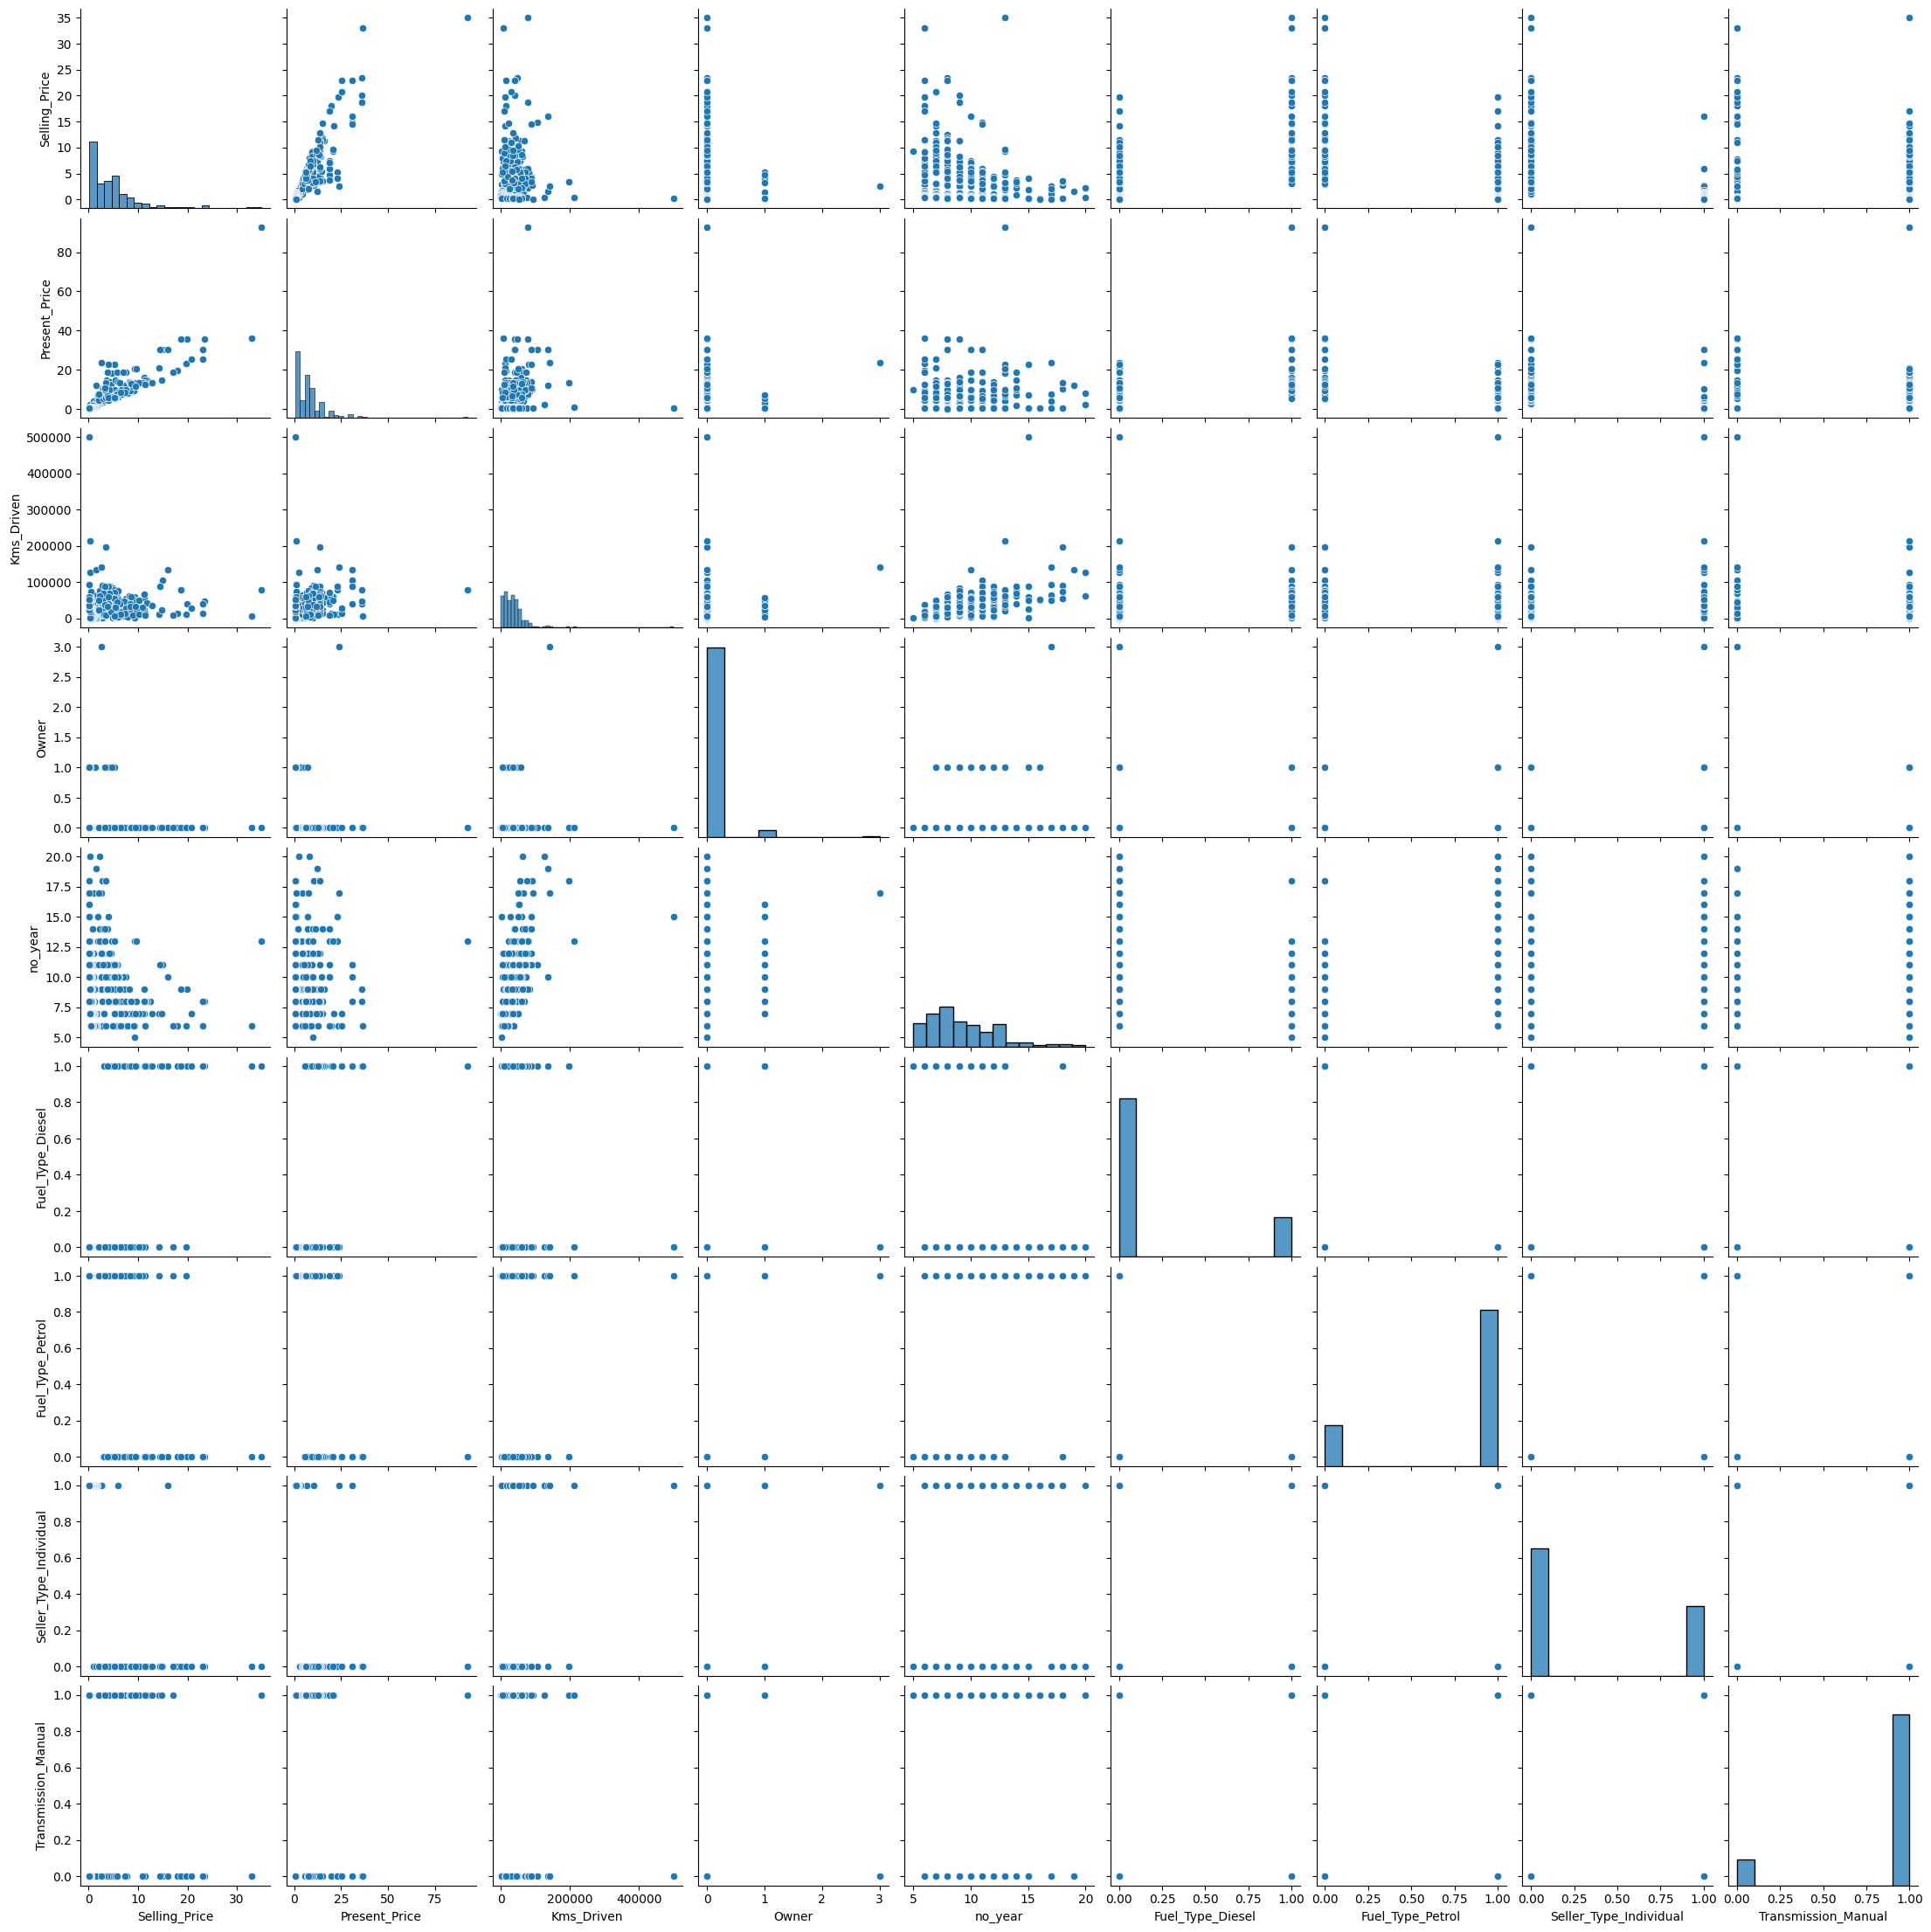

In [25]:
sns.pairplot(final_dataset)

In [26]:
import matplotlib.pyplot as plt
corrmat=final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Axes: >

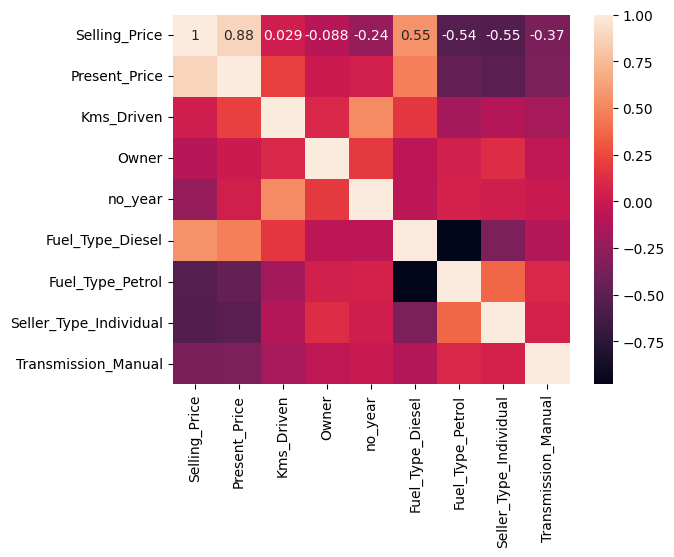

In [27]:
sns.heatmap(final_dataset[top_corr_features].corr(),annot=True)

In [28]:
final_dataset.head()

Selling_Price  Present_Price  Kms_Driven  Owner  no_year  Fuel_Type_Diesel  \
0           3.35           5.59       27000      0        9             False   
1           4.75           9.54       43000      0       10              True   
2           7.25           9.85        6900      0        6             False   
3           2.85           4.15        5200      0       12             False   
4           4.60           6.87       42450      0        9              True   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0              True                   False                 True  
1             False                   False                 True  
2              True                   False                 True  
3              True                   False                 True  
4             False                   False                 True

In [29]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [30]:
X.head()

Present_Price  Kms_Driven  Owner  no_year  Fuel_Type_Diesel  \
0           5.59       27000      0        9             False   
1           9.54       43000      0       10              True   
2           9.85        6900      0        6             False   
3           4.15        5200      0       12             False   
4           6.87       42450      0        9              True   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0              True                   False                 True  
1             False                   False                 True  
2              True                   False                 True  
3              True                   False                 True  
4             False                   False                 True

In [31]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

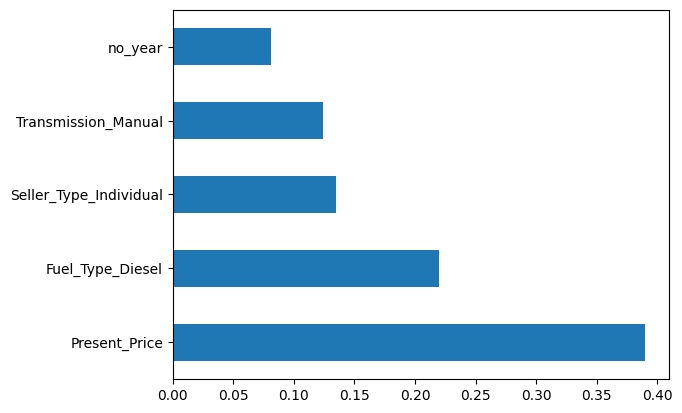

In [32]:
feat_imprtance=pd.Series(model.feature_importances_,index=X.columns)
feat_imprtance.nlargest(5).plot(kind="barh")
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [34]:
X_train.shape

(240, 8)

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [36]:
n_estimaters=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimaters)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [39]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [40]:
rf=RandomForestRegressor()

In [41]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [42]:
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

/Users/hiro/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/hiro/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hiro/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/hiro/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parame

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [43]:
rf_random.best_params_


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [44]:
rf_random.best_score_


-4.076505912128337

In [45]:
predictions=rf_random.predict(X_test)


/var/folders/44/nbbyll_10jd0z8rj_qxm43740000gn/T/ipykernel_23103/2754339884.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)
/Users/hiro/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hiro/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

<Axes: xlabel='Selling_Price', ylabel='Density'>

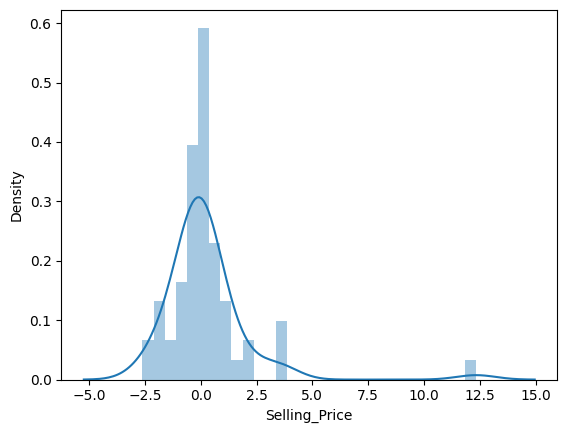

In [46]:
sns.distplot(y_test-predictions)


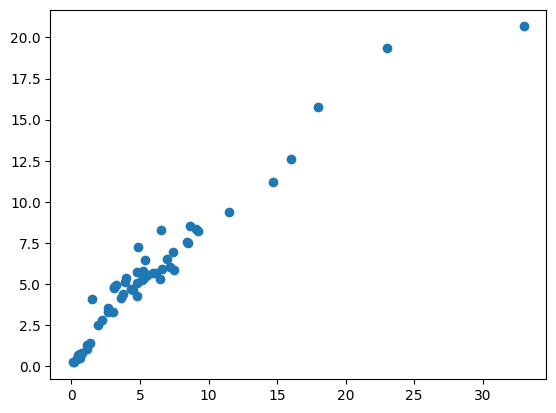

In [47]:
plt.scatter(y_test,predictions)


In [48]:
from sklearn import metrics


In [49]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.0059937704918043
MSE: 3.9622110672426194
RMSE: 1.990530348234515


In [50]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)